



# **Importing**

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn import model_selection
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout ,GRU,Flatten,Conv1D,GlobalAveragePooling1D
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv("/content/dataset.csv")


# **preprocessing**

In [ ]:
# Initialize NLTK resources
nltk.download('stopwords')
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

def preprocess(tweet):
    # Remove extra spaces
    tweet = re.sub(r'\s+', ' ', tweet)

    # Remove mentions (@username)
    tweet = re.sub(r'@[\w-]+', '', tweet)

    # Remove URLs
    tweet = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', tweet)

    # Remove punctuations, numbers, and convert to lowercase
    tweet = re.sub(r'[^a-zA-Z]', ' ', tweet).lower()

    # Tokenize
    words = tweet.split()

    # Remove stopwords and apply stemming
    words = [stemmer.stem(word) for word in words if word not in stop_words]

    # Join the words back into a string
    processed_tweet = ' '.join(words)

    return processed_tweet

# Preprocess tweets in the dataset
dataset['processed_tweets'] = dataset['tweet'].apply(preprocess)
print("PREPROCESSED SUCCESSFULLY...")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


PREPROCESSED SUCCESSFULLY...


In [ ]:
#Drop "id" column from datasets
dataset = dataset.drop("id", axis = 1)

print("'ID' COLUMNS DROPPED SUCCESFULLY...")


'ID' COLUMNS DROPPED SUCCESFULLY...


In [ ]:
#Drop "tweet" column from datasets
dataset = dataset.drop("tweet", axis = 1)

print("'tweet' COLUMNS DROPPED SUCCESFULLY...")


'tweet' COLUMNS DROPPED SUCCESFULLY...


In [ ]:
print(dataset.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   label             31962 non-null  int64 
 1   processed_tweets  31962 non-null  object
dtypes: int64(1), object(1)
memory usage: 499.5+ KB
None


# **Splitting the dataset**

In [ ]:
x = dataset["processed_tweets"]
y = dataset["label"]

train_x, test_x, train_y, test_y = model_selection.train_test_split(x, y, test_size = 0.20, shuffle = True, random_state = 11)

print("DIVIDED SUCCESFULLY...")

DIVIDED SUCCESFULLY...


# **Tokenization and Padding**

In [ ]:
# Define tokenizer
vocab_size = 50000
max_length = 20
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(train_x)

# Tokenize
train_sequences = tokenizer.texts_to_sequences(train_x)
test_sequences = tokenizer.texts_to_sequences(test_x)

# Pad sequences
train_pad_seq = pad_sequences(train_sequences, maxlen=max_length, truncating='post')
test_pad_seq = pad_sequences(test_sequences, maxlen=max_length, truncating='post')

print("Tokenization and padding completed successfully...")


Tokenization and padding completed successfully...


# **Model Definitions**

In [ ]:
embedding_dim = 100
# Use early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# **LSTM**

In [ ]:
# Define the LSTM model architecture
model_lstm = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    Bidirectional(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2)),
    Dense(units=1, activation='sigmoid')
])


mmodel_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



# Fit the model on training data
history_lstm = model_lstm.fit(train_pad_seq, train_y, epochs=20, batch_size=64,
                               validation_data=(test_pad_seq, test_y), callbacks=[early_stopping])

# Evaluate the model
loss_lstm, accuracy_lstm = model_lstm.evaluate(test_pad_seq, test_y)
print("Test Loss_lstm:", loss_lstm)
print("Test Accuracy_lstm:", accuracy_lstm)

# Print model summary
print(model_lstm.summary())

Epoch 1/20
400/400 [==============================] - 126s 295ms/step - loss: 0.1637 - accuracy: 0.9482 - val_loss: 0.1235 - val_accuracy: 0.9556
Epoch 2/20
400/400 [==============================] - 115s 288ms/step - loss: 0.0652 - accuracy: 0.9781 - val_loss: 0.1329 - val_accuracy: 0.9587
Epoch 3/20
400/400 [==============================] - 95s 237ms/step - loss: 0.0329 - accuracy: 0.9895 - val_loss: 0.1567 - val_accuracy: 0.9553
Epoch 4/20
200/200 [==============================] - 4s 18ms/step - loss: 0.1235 - accuracy: 0.9556
Test Loss_lstm: 0.12345243990421295
Test Accuracy_lstm: 0.9555764198303223
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         5000000   
                                                                 
 bidirectional_1 (Bidirecti  (None, 256)               234496    
 onal)                             

# **GRU**

In [ ]:
# Define the GRU model architecture

model_gru = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    Bidirectional(GRU(units=128, dropout=0.2, recurrent_dropout=0.2)),
    Dense(Dense(units=1, activation='sigmoid'))
])

# Compile the model
model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Fit the model on training data
history_gru = model_gru.fit(train_pad_seq, train_y, epochs=20, batch_size=64,
                             validation_data=(test_pad_seq, test_y), callbacks=[early_stopping])

# Evaluate the model
loss_gru, accuracy_gru = model_gru.evaluate(test_pad_seq, test_y)
print("Test Loss_gru:", loss_gru)
print("Test Accuracy_gru:", accuracy_gru)

# Print the model summary
print(model_gru.summary())

Epoch 1/20
400/400 [==============================] - 113s 260ms/step - loss: 0.1632 - accuracy: 0.9477 - val_loss: 0.1240 - val_accuracy: 0.9565
Epoch 2/20
400/400 [==============================] - 83s 209ms/step - loss: 0.0644 - accuracy: 0.9785 - val_loss: 0.1228 - val_accuracy: 0.9623
Epoch 3/20
400/400 [==============================] - 85s 212ms/step - loss: 0.0298 - accuracy: 0.9902 - val_loss: 0.1401 - val_accuracy: 0.9582
Epoch 4/20
400/400 [==============================] - 86s 214ms/step - loss: 0.0145 - accuracy: 0.9952 - val_loss: 0.1807 - val_accuracy: 0.9579
Epoch 5/20
200/200 [==============================] - 3s 15ms/step - loss: 0.1228 - accuracy: 0.9623
Test Loss_gru: 0.1227656900882721
Test Accuracy_gru: 0.9623025059700012
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 100)         5000000   
                          

# **Flatten**

In [ ]:
# Model Definition with a Flatten layer
model_flatten = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Flatten(),
    Dense(6, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Set the training parametersg
model_flatten.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model on training data
history_flatten = model_flatten.fit(train_pad_seq, train_y, epochs=50, batch_size=20,
                                    validation_data=(test_pad_seq, test_y), callbacks=[early_stopping])

# Evaluate the model
loss_flatten, accuracy_flatten = model_flatten.evaluate(test_pad_seq, test_y)
print("Test Loss:", loss_flatten)
print("Test Accuracy:", accuracy_flatten)

# Print the model summary
print(model_flatten.summary())

Epoch 1/50
1279/1279 [==============================] - 103s 80ms/step - loss: 0.1621 - accuracy: 0.9461 - val_loss: 0.1236 - val_accuracy: 0.9568
Epoch 2/50
1279/1279 [==============================] - 94s 74ms/step - loss: 0.0406 - accuracy: 0.9860 - val_loss: 0.1386 - val_accuracy: 0.9556
Epoch 3/50
1279/1279 [==============================] - 99s 77ms/step - loss: 0.0076 - accuracy: 0.9980 - val_loss: 0.1690 - val_accuracy: 0.9557
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1236 - accuracy: 0.9568
Test Loss: 0.12355872988700867
Test Accuracy: 0.9568277597427368
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 20, 100)           5000000   
                                                                 
 flatten (Flatten)           (None, 2000)              0         
                                            

# **Conv**

In [ ]:
# Model Definition with Convolutional
model_conv = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalAveragePooling1D(),
    Dense(6, activation='relu'),
    Dense(1, activation='sigmoid')
])
# Set the training parameters
model_conv.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model on training data
history_conv = model_conv.fit(train_pad_seq, train_y, epochs=50, batch_size=20,
                              validation_data=(test_pad_seq, test_y), callbacks=[early_stopping])

# Evaluate the model
loss_conv, accuracy_conv = model_conv.evaluate(test_pad_seq, test_y)
print("Test Loss_conv:", loss_conv)
print("Test Accuracy_conv:", accuracy_conv)

# Print the model summary
print(model_conv.summary())


Epoch 1/50
1279/1279 [==============================] - 108s 84ms/step - loss: 0.1764 - accuracy: 0.9466 - val_loss: 0.1179 - val_accuracy: 0.9584
Epoch 2/50
1279/1279 [==============================] - 107s 84ms/step - loss: 0.0649 - accuracy: 0.9780 - val_loss: 0.1206 - val_accuracy: 0.9631
Epoch 3/50
1279/1279 [==============================] - 107s 83ms/step - loss: 0.0348 - accuracy: 0.9894 - val_loss: 0.1439 - val_accuracy: 0.9543
Epoch 4/50
200/200 [==============================] - 1s 4ms/step - loss: 0.1179 - accuracy: 0.9584
Test Loss_conv: 0.11791157722473145
Test Accuracy_conv: 0.9583919644355774
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 20, 100)           5000000   
                                                                 
 conv1d (Conv1D)             (None, 16, 128)           64128     
                                

# **ploting**

<ipython-input-15-4e1bd60d121e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy, palette="Blues_d")


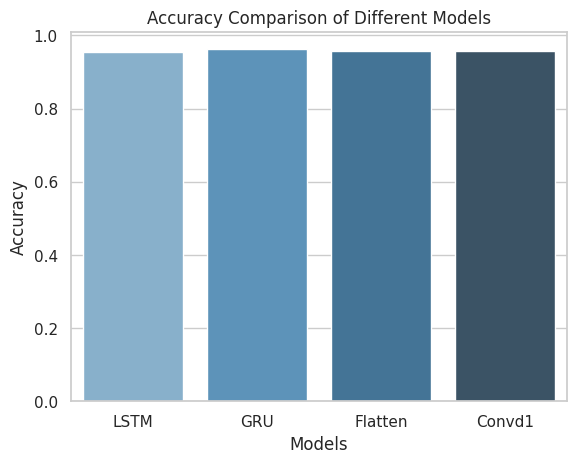

In [ ]:

models = ['LSTM', 'GRU', 'Flatten', 'Convd1']
accuracy = [accuracy_lstm, accuracy_gru, accuracy_flatten, accuracy_conv]
sns.barplot(x=models, y=accuracy, palette="Blues_d")
plt.title('Accuracy Comparison of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

<ipython-input-23-0a74a72ad445>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=losses, palette="Greens")


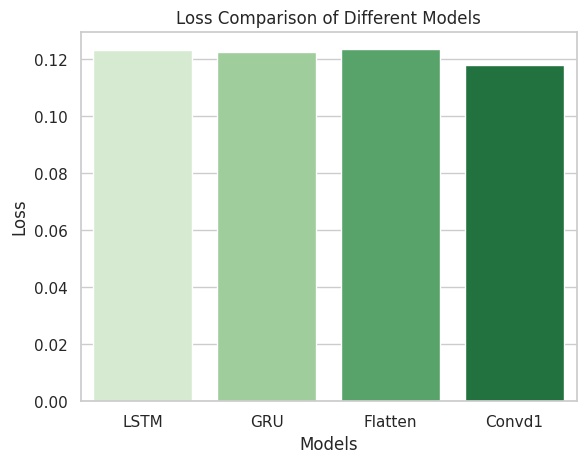

In [ ]:

models = ['LSTM', 'GRU', 'Flatten', 'Convd1']
losses = [loss_lstm, loss_gru, loss_flatten, loss_conv]
sns.barplot(x=models, y=losses, palette="Greens")
plt.title('Loss Comparison of Different Models')
plt.xlabel('Models')
plt.ylabel('Loss')
plt.show()